'''
【课程2.4】  分布数据可视化 - 直方图与密度图

distplot() / kdeplot() / rugplot() 

'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')   # 设置风格、尺度
sns.set_context('paper')

import warnings             # 不发出警告
warnings.filterwarnings('ignore')

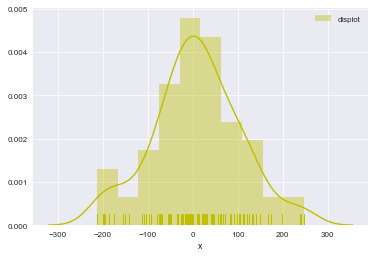

In [6]:
# 1、直方图 - distplot()

rs = np.random.RandomState(10)   # 设定随机数种子
s = pd.Series(rs.randn(100)*100)
sns.distplot(s,bins=10,hist=True,kde=True,
             norm_hist=True,rug=True,vertical=False,
             color='y',label='displot',axlabel='x')
plt.legend()
# bins → 箱数
# hist、ked → 是否显示箱/密度曲线
# norm_hist → 直方图是否按照密度来显示
# rug → 是否显示数据分布情况
# vertical → 是否水平显示
# color → 设置颜色
# label → 图例
# axlabel → x轴标注

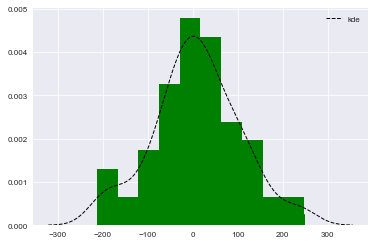

In [8]:
# 1、直方图 - distplot()
# 颜色详细设置

sns.distplot(s,rug=True,
             rug_kws={'color':'g'},                                            # 设置数据频率分布颜色
             kde_kws={'color':'k','lw':1,'label':'kde','linestyle':'--'},      # 设置密度曲线颜色，线宽，标注、线形
             hist_kws={'histtype':'bar','linewidth':1,'alpha':1,'color':'g'})  # 设置箱子的风格、线宽、透明度、颜色
                                                                               # 风格包括：'bar', 'barstacked', 'step', 'stepfilled'

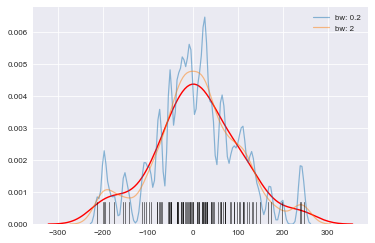

In [11]:
# 2、密度图 - kdeplot()
# 单个样本数据密度分布图

sns.kdeplot(s,
            shade=False,               # 是否填充
            color='r',                 # 设置颜色
            vertical=False)            # 设置是否水平


# bw → 控制拟合的程度，类似直方图的箱数
sns.kdeplot(s,bw=5,label='bw: 0.2',linestyle='-',linewidth=1.2,alpha=.5)
sns.kdeplot(s,bw=20,label='bw: 2',linestyle='-',linewidth=1.2,alpha=.5)


sns.rugplot(s,height=.1,color='k',alpha=.5) # 数据频率分布图

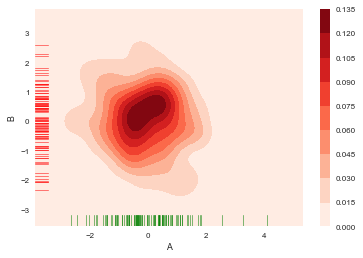

In [13]:
# 2、密度图 - kdeplot()
# 两个样本数据密度分布图

rs = np.random.RandomState(2)
df = pd.DataFrame(rs.randn(100,2),
                  columns=['A','B'])
sns.kdeplot(df['A'],df['B'],
            cbar=True,              # 是否显示颜色图例
            shade=True,             # 是否填充
            cmap='Reds',            # 设置调色盘
            shade_lowest=True,      # 最外围颜色是否显示
            n_levels=10)            # 曲线个数（如果非常多，则会越平滑）
                                    # 两个维度数据生成曲线密度图，以颜色作为密度衰减显示
    
sns.rugplot(df['A'],color='g',axis='x',alpha=.5)
sns.rugplot(df['B'],color='r',axis='y',alpha=.5)

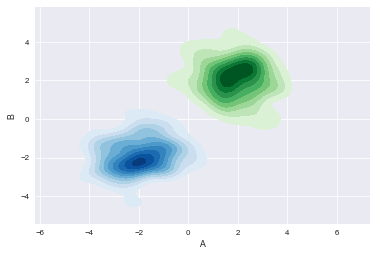

In [14]:
# 2、密度图 - kdeplot()
# 两个样本数据密度分布图
# 多个密度图

rs1 = np.random.RandomState(2)                         # 创建数据
rs2 = np.random.RandomState(5)
df1 = pd.DataFrame(rs1.randn(100,2)+2,columns=['A','B'])
df2 = pd.DataFrame(rs2.randn(100,2)-2,columns=['A','B'])

sns.kdeplot(df1['A'],df1['B'],cmap='Greens',           # 创建图表
            shade=True,shade_lowest=False)

sns.kdeplot(df2['A'],df2['B'],cmap='Blues',
            shade=True,shade_lowest=False)

'''
【课程2.5】  分布数据可视化 - 散点图

jointplot() / pairplot()

'''

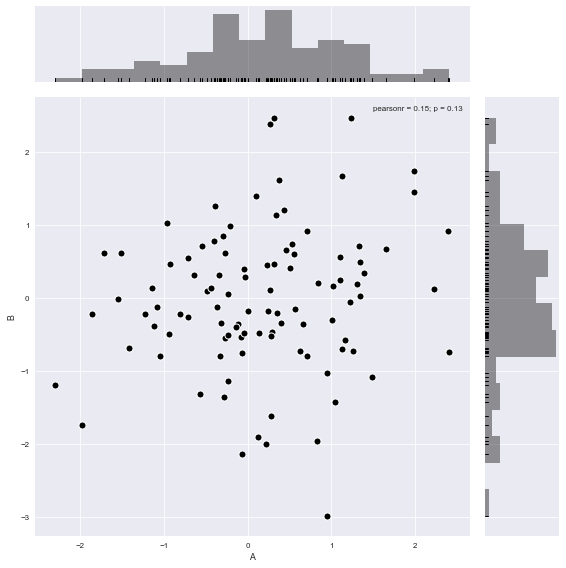

In [16]:
# 1、综合散点图 - jointplot()
# 散点图 + 分布图

rs = np.random.RandomState(10)                        # 设定随机数种子
df = pd.DataFrame(rs.randn(100,2),columns=['A','B'])

sns.jointplot(x=df['A'],y=df['B'],                     # 设置xy轴，显示columns名称
              data=df,                                 # 设置数据 
              color='k',                               # 设置颜色
              s=50,edgecolor='w',linewidth=1,          # 设置散点大小、边缘线颜色及宽度(只针对scatter）
              kind='scatter',                          # 设置类型：“scatter”、“reg”、“resid”、“kde”、“hex”
              space=.2,                                # 设置散点图和布局图的间距
              size=8,                                  # 图表大小（自动调整为正方形）
              ratio=5,                                 # 散点图与布局图高度比，整型
              marginal_kws=dict(bins=15,rug=True))     # 设置柱状图箱数，是否设置rug

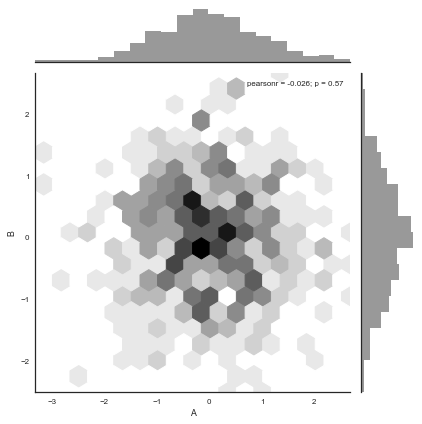

In [17]:
# 1、综合散点图 - jointplot()
# 散点图 + 分布图
# 六边形图

df = pd.DataFrame(rs.randn(500,2),columns=['A','B'])
with sns.axes_style('white'):
    sns.jointplot(x=df['A'],y=df['B'],data=df,kind='hex',color='k',
                  marginal_kws=dict(bins=20))

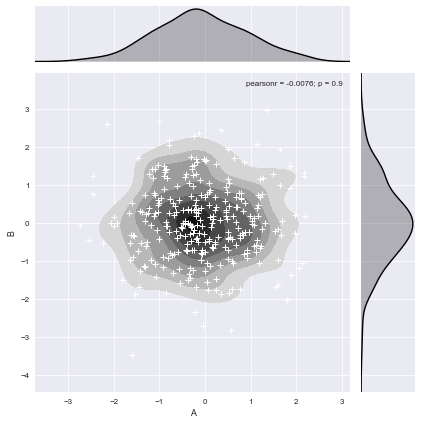

In [19]:
# 1、综合散点图 - jointplot()
# 散点图 + 分布图
# 密度图

rs = np.random.RandomState(15)
df = pd.DataFrame(rs.randn(300,2),columns = ['A','B'])

g = sns.jointplot(df['A'],df['B'],data=df,                   # 创建密度图
                  kind='kde',color='k',
                  shade_lowest=False)

g.plot_joint(plt.scatter,c='w',s=30,linewidth=1,marker='+')  # 添加散点图

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


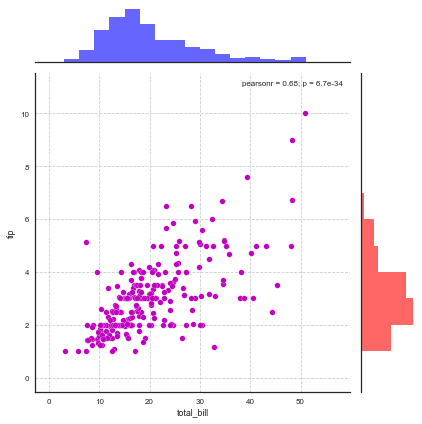

In [24]:
# 1、综合散点图 - JointGrid()
# 可拆分绘制的散点图
# plot_joint() + ax_marg_x.hist() + ax_marg_y.hist()

sns.set_style('white')                               # 设置风格

tips = sns.load_dataset('tips')                      # 导入数据
print(tips.head()) 

g = sns.JointGrid(x='total_bill',y='tip',data=tips)  # 创建一个绘图表格区域，设置好x、y对应数据

g.plot_joint(plt.scatter,color='m',edgecolor='white')# 设置框内图表，scatter

g.ax_marg_x.hist(tips['total_bill'],color='b',       # 设置x轴直方图，注意bins是数组
                 alpha=.6,bins=np.arange(0,60,3))

g.ax_marg_y.hist(tips['tip'],color='r',alpha=.6,     # 设置x轴直方图，注意需要orientation参数
                 orientation='horizontal',
                 bins=np.arange(0,12,1))

from scipy import stats
g.annotate(stats.pearsonr)                           # 设置标注，可以为pearsonr，spearmanr

plt.grid(linestyle='--')

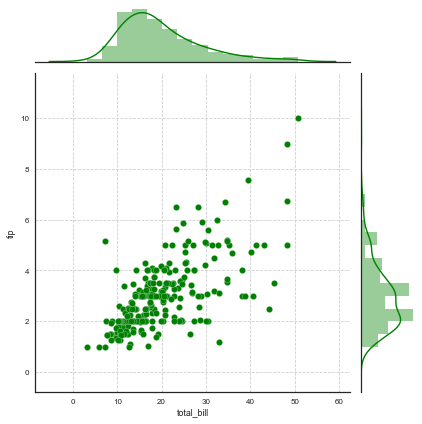

In [29]:
# 1、综合散点图 - JointGrid()
# 可拆分绘制的散点图
# plot_joint() + plot_marginals()

g = sns.JointGrid(x='total_bill',y='tip',data=tips)              # 创建一个绘图表格区域，设置好x、y对应数据
g = g.plot_joint(plt.scatter,color='g',s=40,edgecolor='white')   # 绘制散点图
plt.grid(linestyle='--')

g.plot_marginals(sns.distplot,kde=True,color='g')                 # 绘制x，y轴直方图

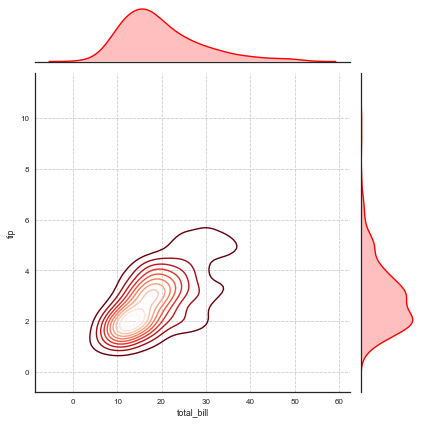

In [31]:
# 1、综合散点图 - JointGrid()
# 可拆分绘制的散点图
# plot_joint() + plot_marginals()
# kde - 密度图

g = sns.JointGrid(x='total_bill',y='tip',data=tips)     # 创建一个绘图表格区域，设置好x、y对应数据
g = g.plot_joint(sns.kdeplot,cmap='Reds_r')
plt.grid(linestyle='--')
g.plot_marginals(sns.kdeplot,shade=True,color='r')      # 绘制x，y轴密度图         

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


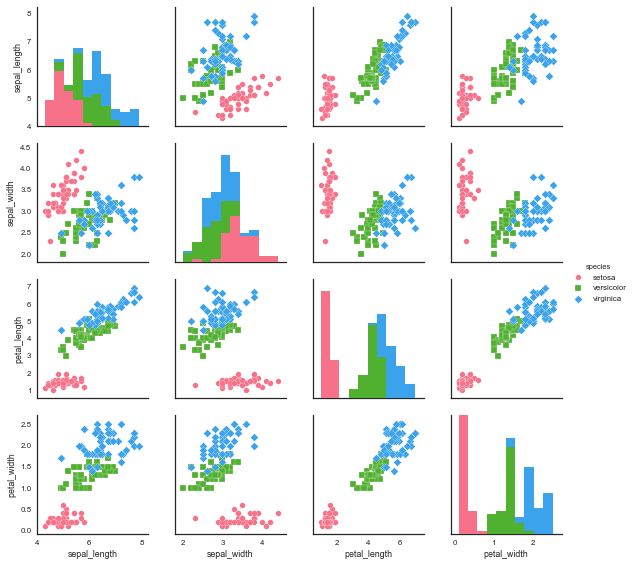

In [33]:
# 2、矩阵散点图 - pairplot()

sns.set_style('white')
iris = sns.load_dataset('iris')
print(iris.head())

sns.pairplot(iris,
             kind='scatter',            # 散点图/回归分布图 {‘scatter’, ‘reg’}  
             diag_kind='hist',          # 直方图/密度图 {‘hist’, ‘kde’}
             hue='species',             # 按照某一字段进行分类
             palette='husl',            # 设置调色板
             markers=['o','s','D'],     # 设置不同系列的点样式（这里根据参考分类个数）
             size=2)                    # 图表大小

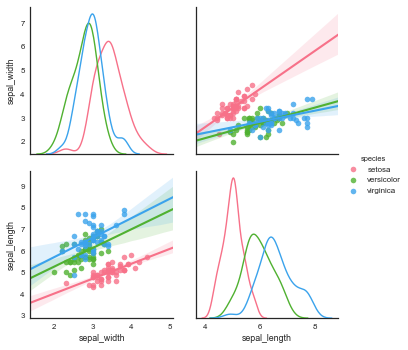

In [36]:
# 2、矩阵散点图 - pairplot()
# 只提取局部变量进行对比

sns.pairplot(iris,
             vars=['sepal_width','sepal_length'],
             kind='reg',
             diag_kind='kde',
             hue='species',
             palette='husl')

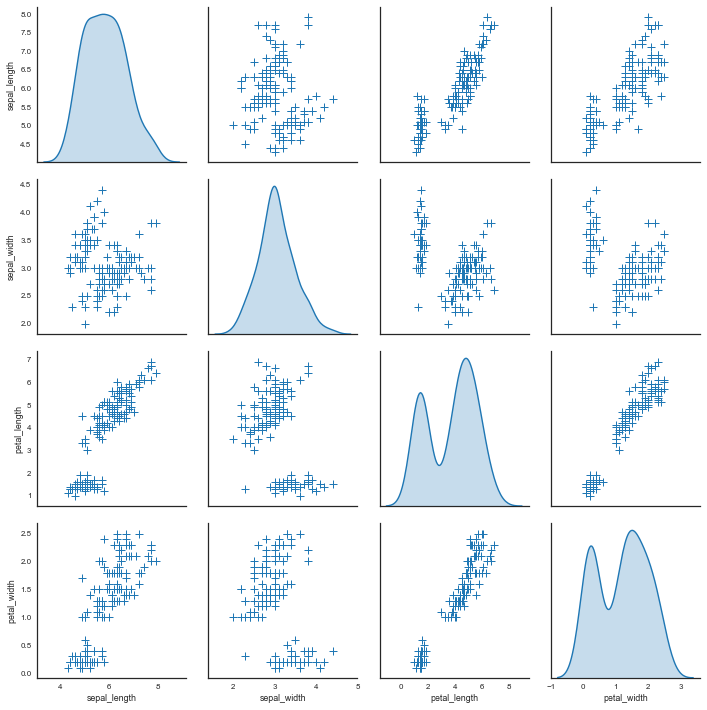

In [37]:
# 2、矩阵散点图 - pairplot()
# 其他参数设置

sns.pairplot(iris,
             diag_kind='kde',
             markers='+',                                  
             plot_kws=dict(s=50,edgecolor='b',linewidth=1), # 设置点样式
             diag_kws=dict(shade=True)                      # 设置密度图样式
            )

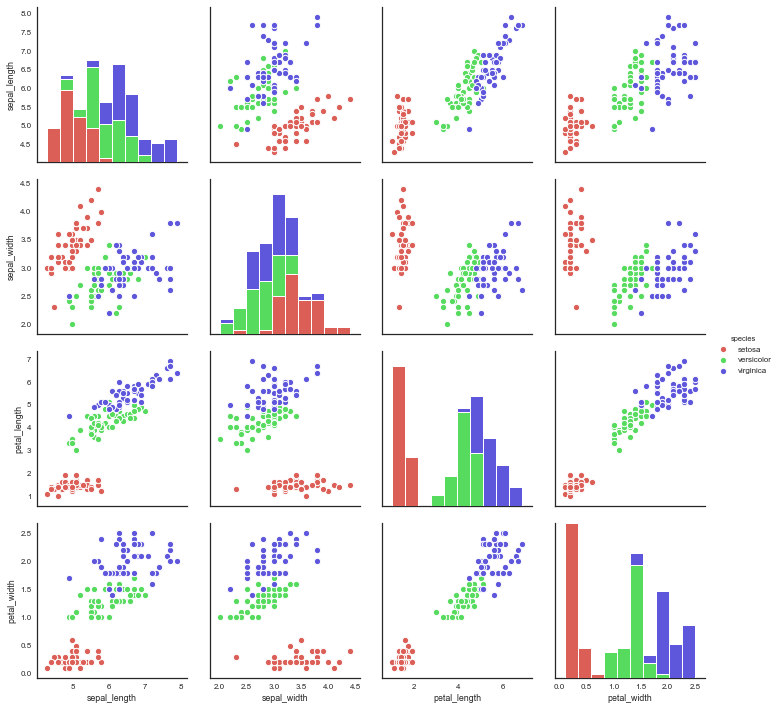

In [40]:
# 2、矩阵散点图 - PairGrid()
# 可拆分绘制的散点图
# map_diag() + map_offdiag()

g = sns.PairGrid(iris,                # 创建一个绘图表格区域，设置好x、y对应数据，按照species分类
                 hue='species',
                 palette='hls',
                 vars=['sepal_length','sepal_width','petal_length','petal_width'])

g.map_diag(plt.hist,                  # 对角线图表，plt.hist/sns.kdeplot
           histtype='barstacked',     # 可选：'bar', 'barstacked', 'step', 'stepfilled'
           linewidth=1,
           edgecolor='w')

g.map_offdiag(plt.scatter,            # 其他图表，plt.scatter/plt.bar...
              edgecolor='w',          # 设置点颜色、大小、描边宽度
              s=40,
              linewidth=1)
g.add_legend()                        # 添加图例